## Problem Set 4
### MACS 30100, Dr. Evans
### Leoson Hoay

**Importing necessary packages:**

In [43]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy.linalg as lin
import scipy.stats as sts
import scipy.optimize as opt
import scipy.integrate as intgr
import statsmodels.api as sm
import matplotlib.pyplot as plt

c:\users\leoso\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Problem (1) 
**Multiple Linear Regression**

**(a)**

In [15]:
# identifying NA values as '?'
auto_df = pd.read_csv("../../../ProblemSets/PS4/Auto.csv", na_values = "?")

In [16]:
auto_df.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


**(b)**

<IPython.core.display.Javascript object>


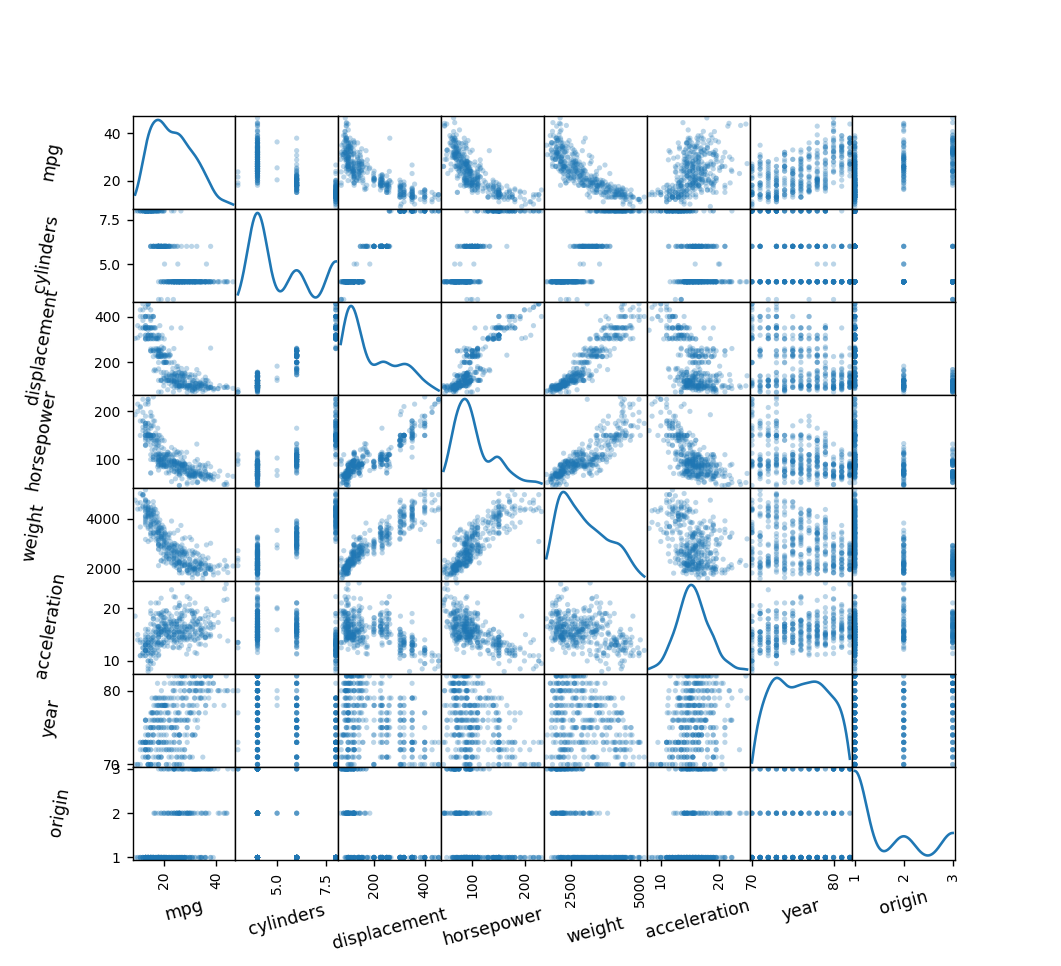

In [35]:
%matplotlib notebook
axs = scatter_matrix(auto_df, alpha=0.3, figsize =(6,6), diagonal='kde')
# rotate labels for visibility
n = len(auto_df.columns)
for x in range(n-1):
    for y in range(n-1):
        ax = axs[x, y]  
        ax.xaxis.label.set_rotation(15) 
        ax.yaxis.label.set_rotation(80)
        ax.yaxis.labelpad = 25

**(c)**

In [42]:
auto_df.corr('pearson', 1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


**(d)**

In [47]:
reg1 = sm.OLS(auto_df['mpg'], auto_df[['cylinders', 'displacement', 'horsepower', 'weight', 
                                       'acceleration', 'year', 'origin']], missing='drop')

In [48]:
results1 = reg1.fit()

In [49]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2933.
Date:                Mon, 29 Jan 2018   Prob (F-statistic):               0.00
Time:                        15:33:47   Log-Likelihood:                -1030.4
No. Observations:                 392   AIC:                             2075.
Df Residuals:                     385   BIC:                             2103.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181   

**(i)**